In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
def seperator():
    print('\n')
    temp = ''
    for i in range(30):
        temp += '-'
    return temp + "DEVIDER" + temp
divider = seperator()

### Data Info

In [23]:
alldata = pd.read_csv("train.csv")
print(alldata.head())
print(divider)
description = alldata.describe()
print(description)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
-----

What we can get from the data description above is that:

1. 38.38% passengers survived

2. Most of the passengers are in class 3

3. Except for None data, most of the passengers are young people: The mean age is 29.70, and the middle is 28. Most of the passengers have one sibling.

### Detect null Data

In [24]:
print('Data Shape:' + str(alldata.shape))
print('Nulls in every column')
alldata.isnull().sum(axis = 0)

Data Shape:(891, 12)
Nulls in every column


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Clean unuseful columns
There are too much null data in column Cabin, just drop it. Name is also not helpful, drop it as well.

In [20]:
alldata.drop(['Name', 'Cabin'], axis = 1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,S
887,888,1,1,female,19.0,0,0,112053,30.0000,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C


## Data Visualization

Text(0, 0.5, 'Number of people')

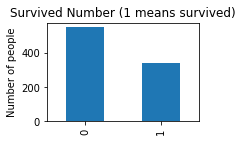

In [27]:
plt.figure(figsize=(20,10))
plt.subplot2grid((2,2),(0,0))
alldata.Survived.value_counts().plot(kind = 'bar')
plt.title('Survived Number (1 means survived)')
plt.ylabel('Number of people')